Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from keras import layers

Generate/Prepare data for training and testing

In [2]:
# Function to generate synthetic quantum states
def generate_quantum_states(num_samples):
    theta = np.random.uniform(0, np.pi, num_samples)
    phi = np.random.uniform(0, 2 * np.pi, num_samples)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    labels = np.random.randint(0, 2, num_samples)
    return np.column_stack((x, y, z)), labels

# Generate dataset
X, y = generate_quantum_states(1000)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# --- SVM Classifier ---
svm_model = svm.SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions from SVM
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.515
              precision    recall  f1-score   support

           0       0.60      0.31      0.41       108
           1       0.48      0.75      0.59        92

    accuracy                           0.52       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.52      0.49       200



In [4]:
# --- Recurrent Neural Network Classifier ---
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = keras.Sequential([
    layers.LSTM(16, input_shape=(1, 3), return_sequences=True),
    layers.LSTM(8),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Recurrent Neural Network
rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, verbose=0)

# Predictions from RNN
rnn_predictions = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")

# Evaluate RNN
rnn_accuracy = accuracy_score(y_test, rnn_predictions)
print("Recurrent Neural Network Accuracy:", rnn_accuracy)
print(classification_report(y_test, rnn_predictions))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Recurrent Neural Network Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       108
           1       0.50      0.55      0.53        92

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



Plot the scattered graph

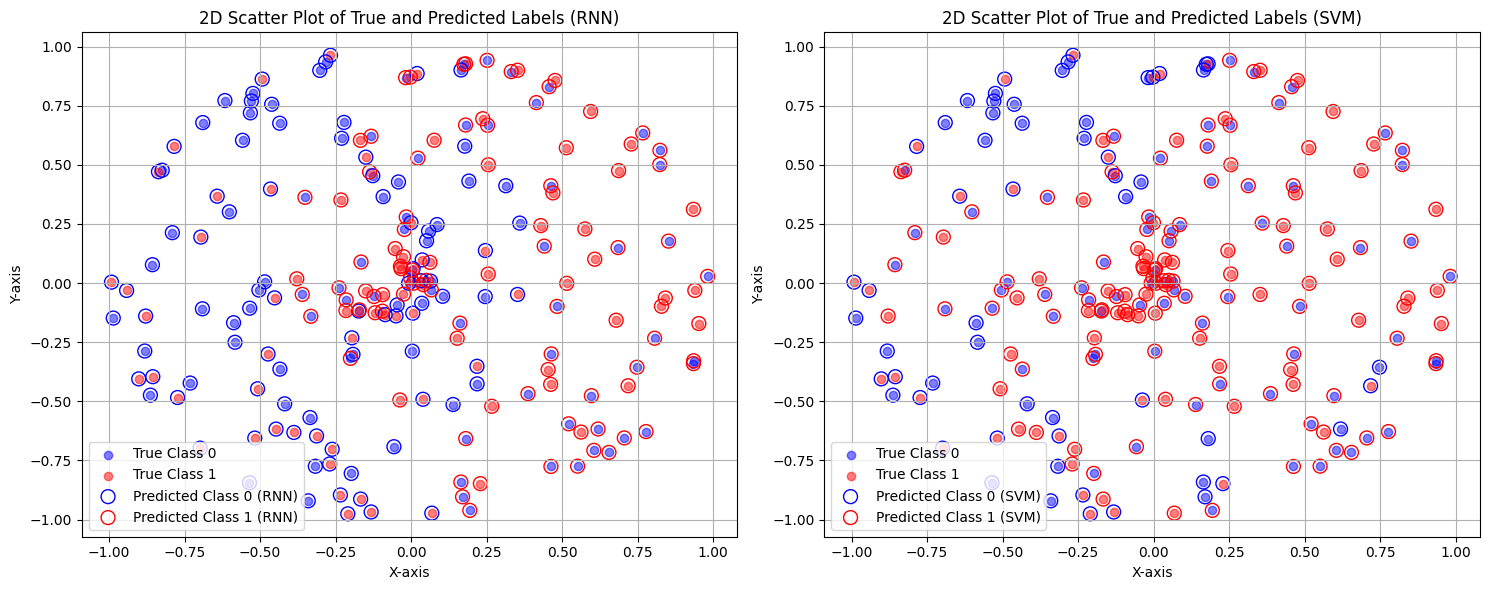

In [5]:
# --- Plotting ---
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create a scatter plot for RNN predictions
# True labels
axs[0].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='True Class 0', alpha=0.5)
axs[0].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='True Class 1', alpha=0.5)

# Predicted labels from RNN
axs[0].scatter(X_test[rnn_predictions.flatten() == 0][:, 0], X_test[rnn_predictions.flatten() == 0][:, 1], 
                edgecolor='blue', facecolor='none', label='Predicted Class 0 (RNN)', s=100, marker='o')
axs[0].scatter(X_test[rnn_predictions.flatten() == 1][:, 0], X_test[rnn_predictions.flatten() == 1][:, 1], 
                edgecolor='red', facecolor='none', label='Predicted Class 1 (RNN)', s=100, marker='o')

axs[0].set_title('2D Scatter Plot of True and Predicted Labels (RNN)')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].legend()
axs[0].grid()

# Create a scatter plot for SVM predictions
# True labels
axs[1].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='True Class 0', alpha=0.5)
axs[1].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='True Class 1', alpha=0.5)

# Predicted labels from SVM
axs[1].scatter(X_test[svm_predictions == 0][:, 0], X_test[svm_predictions == 0][:, 1], 
                edgecolor='blue', facecolor='none', label='Predicted Class 0 (SVM)', s=100, marker='o')
axs[1].scatter(X_test[svm_predictions == 1][:, 0], X_test[svm_predictions == 1][:, 1], 
                edgecolor='red', facecolor='none', label='Predicted Class 1 (SVM)', s=100, marker='o')

axs[1].set_title('2D Scatter Plot of True and Predicted Labels (SVM)')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].legend()
axs[1].grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()